<a href="https://colab.research.google.com/github/aditya-saurabh/Coursera_Capstone/blob/master/Bombay_Neighbourhood_Battle_%7C_Capstone_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Battle of Neighbourhood** #
#### compare various neighbourhoods of Mumbai and clustering them based on similarity of various localities. This could be pretty useful for someone who is planning to change locality.<br> Key techniques has been listed below: ####
#### <ul><li> Neighbourhood data is collected from <a href = https://www.mapsofindia.com/pincode/india/maharashtra/mumbai/>here</a><li> Foursquare API has been used to explore the nearby venue<li>Folium library has been used to generate interactive maps of the city<li>K Means clustering algorithm has been used to cluster data

In [0]:
# Importing libraries

In [0]:
import pandas as pd
from geopy.geocoders import Nominatim
import numpy as np
import requests
import folium
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [3]:
#For four-square API call
CLIENT_ID = 'NXLQWZGXTP2WIFOLL5P3QMROZFNFEC4LE3JJCIVZGLLRNUF5' # your Foursquare ID
CLIENT_SECRET = 'H2RZXGB5WGWMMFNPXC3TXSAEETKXRQJCHJ5FBTD4SEZKRX54' # your Foursquare Secret
VERSION = '20191012' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NXLQWZGXTP2WIFOLL5P3QMROZFNFEC4LE3JJCIVZGLLRNUF5
CLIENT_SECRET:H2RZXGB5WGWMMFNPXC3TXSAEETKXRQJCHJ5FBTD4SEZKRX54


The data of various localities of Mumbai has been taken from the url below. The table is extracted and but into the pandas dataframe for further investigation.

In [0]:
url_loc = 'https://www.mapsofindia.com/pincode/india/maharashtra/mumbai/'
neigh_data = pd.read_html(url_loc)

## Refining the dataset ##

In [5]:
df = neigh_data[0]
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(183, 4)

In [7]:
df.head()

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,A I staff colony,400029,Maharashtra,Mumbai
2,Aareymilk Colony,400065,Maharashtra,Mumbai
3,Agripada,400011,Maharashtra,Mumbai
4,Airport,400099,Maharashtra,Mumbai


In [8]:
# Putting appropriate column heading
df.columns = df.loc[0]
df.drop(index = 0, axis = 0, inplace = True)
df.head()

,Location,Pincode,State,District
1,A I staff colony,400029,Maharashtra,Mumbai
2,Aareymilk Colony,400065,Maharashtra,Mumbai
3,Agripada,400011,Maharashtra,Mumbai
4,Airport,400099,Maharashtra,Mumbai
5,Ambewadi,400004,Maharashtra,Mumbai


In [9]:
df.shape

(182, 4)

In [10]:
df.reset_index(inplace = True, drop = True)
df.head()

,Location,Pincode,State,District
0,A I staff colony,400029,Maharashtra,Mumbai
1,Aareymilk Colony,400065,Maharashtra,Mumbai
2,Agripada,400011,Maharashtra,Mumbai
3,Airport,400099,Maharashtra,Mumbai
4,Ambewadi,400004,Maharashtra,Mumbai


In [0]:
df.drop(labels = ['State', 'District'], axis = 1, inplace = True, )

In [12]:
df.head()

,Location,Pincode
0,A I staff colony,400029
1,Aareymilk Colony,400065
2,Agripada,400011
3,Airport,400099
4,Ambewadi,400004


In [13]:
df.describe(include='all')

,Location,Pincode
count,182,182
unique,182,67
top,Hanuman Road,400003
freq,1,7


In [0]:
# There are only 67 unique Pin Code, so aggregating Location together and grouping by Pincode
df = df.groupby('Pincode').agg(lambda col: ', '.join(col)).reset_index(drop = False)

In [15]:
df.head()

,Pincode,Location
0,400001,"Bazargate, M.P.t., Mumbai., Stock Exchange, Ta..."
1,400002,"Kalbadevi, Ramwadi, S. c. court, Shroff Mahaja..."
2,400003,"B P t colony, B.P.lane, Mandvi, Masjid, Noor B..."
3,400004,"Ambewadi, Charni Road, Chaupati, Girgaon, Madh..."
4,400005,"Asvini, Colaba, Holiday Camp, V.W.t.c."


In [0]:
latitude = []
longitude = []
geolocation = Nominatim(user_agent= 'four-square')
for zipcode in df.Pincode:
  location = geolocation.geocode(query = {'country': 'India', 'city' : 'Mumbai', 'postalcode' : str(zipcode)})
  
  if location:
    latitude.append(location.latitude)
    longitude.append(location.longitude)
  else:
    latitude.append('NaN')
    longitude.append('NaN')
  


In [17]:
df['Latitude'] = latitude
df['Longitude'] = longitude
df.head()

,Pincode,Location,Latitude,Longitude
0,400001,"Bazargate, M.P.t., Mumbai., Stock Exchange, Ta...",18.9388,72.8353
1,400002,"Kalbadevi, Ramwadi, S. c. court, Shroff Mahaja...",18.9388,72.8353
2,400003,"B P t colony, B.P.lane, Mandvi, Masjid, Noor B...",18.9388,72.8353
3,400004,"Ambewadi, Charni Road, Chaupati, Girgaon, Madh...",18.9388,72.8353
4,400005,"Asvini, Colaba, Holiday Camp, V.W.t.c.",18.9388,72.8353


In [18]:
df.describe()

,Pincode,Location,Latitude,Longitude
count,67,67,67.000000,67.000000
unique,67,67,37.000000,37.000000
top,400059,"Kidwai Nagar, Wadala, Wadala Rs",18.938771,72.835335
freq,1,1,28.000000,28.000000


In [0]:
df = df[df['Latitude'] != 'NaN']

In [20]:
df.describe()

,Pincode,Location,Latitude,Longitude
count,63,63,63.000000,63.000000
unique,63,63,36.000000,36.000000
top,400059,"Kidwai Nagar, Wadala, Wadala Rs",18.938771,72.835335
freq,1,1,28.000000,28.000000


In [0]:

df.reset_index(drop = True, inplace = True)

In [0]:
#Removing dublicate co-ordinates and replacing it with the first value
bool_data = df.duplicated(subset  = 'Latitude', keep = 'first')

In [0]:
df = df[~bool_data]

In [24]:
df.reset_index(inplace = True, drop = True)
df.head()

,Pincode,Location,Latitude,Longitude
0,400001,"Bazargate, M.P.t., Mumbai., Stock Exchange, Ta...",18.9388,72.8353
1,400011,"Agripada, Chinchpokli, Haines Road, Jacob Circle",19.0359,72.8915
2,400017,"Dharavi, Dharavi Road",19.0458,72.8554
3,400029,"A I staff colony, Santacruz P&t colony",19.078,72.8648
4,400049,Juhu,19.1096,72.834


In [25]:
df.shape

(36, 4)

## Exploratory Data Analysis

In [26]:
#Plotting the various localitites in Mumbai
bombay = folium.Map(zoom_start = 10, location= [19.07, 72.87])

for loc, lat, lon in zip(df.Location, df.Latitude, df.Longitude):
  folium.CircleMarker(
      [float(lat), float(lon)],
      radius = 10,
      popup = str(loc),
      color = 'red',
      fill_color = True
  ).add_to(bombay)

bombay

In [0]:
data = df.copy()

In [0]:
latitude = data['Latitude'][4]
longitude = data['Longitude'][4]

LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
  CLIENT_ID,
  CLIENT_SECRET,
  VERSION, latitude, longitude,
  radius, LIMIT)
  
results = requests.get(url).json()

In [0]:
results = results['response']['groups'][0]['items']

In [0]:
result = json_normalize(results)

In [31]:
result.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.postalCode
0,e-0-5353bd55498ed44d14437bd3-0,0,"[{'summary': 'This spot is popular', 'type': '...",5353bd55498ed44d14437bd3,Naturals,Next to ONGC,near irla,19.111204,72.837255,"[{'label': 'display', 'lat': 19.11120350275779...",381,IN,Mumbai,Mahārāshtra,India,"[Next to ONGC (near irla), Mumbai, Mahārāshtra...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN
1,e-0-4b812590f964a5205d9830e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b812590f964a5205d9830e3,Amar Juice Centre,1st Road,Vile Parle (West),19.109553,72.837021,"[{'label': 'display', 'lat': 19.10955333297317...",314,IN,Mumbai,Mahārāshtra,India,"[1st Road (Vile Parle (West)), Mumbai 400056, ...","[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",0,[],400056
2,e-0-4dee1e62fa76b21ed992f8e8-2,0,"[{'summary': 'This spot is popular', 'type': '...",4dee1e62fa76b21ed992f8e8,6th road sev puri,"NS Road 6, JVPD Scheme",NaN,19.107177,72.832905,"[{'label': 'display', 'lat': 19.10717692259851...",298,IN,Mumbai,Mahārāshtra,India,"[NS Road 6, JVPD Scheme, Mumbai, Mahārāshtra, ...","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],NaN
3,e-0-4e12a5076365b168494d1d0d-3,0,"[{'summary': 'This spot is popular', 'type': '...",4e12a5076365b168494d1d0d,kaifi azmi park,10th rd,NaN,19.112414,72.830630,"[{'label': 'display', 'lat': 19.11241416644558...",472,IN,Mumbai,Mahārāshtra,India,"[10th rd, Mumbai, Mahārāshtra, India]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN
4,e-0-4ca5c24b7334236a5dc81858-4,0,"[{'summary': 'This spot is popular', 'type': '...",4ca5c24b7334236a5dc81858,Jacky Bhel Puri,gulmohar crossroad 7,jvpd,19.113633,72.834702,"[{'label': 'display', 'lat': 19.11363278970635...",449,IN,Mumbai,Mahārāshtra,India,"[gulmohar crossroad 7 (jvpd), Mumbai 400049, ...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],400049


In [0]:
features = ['venue.name', 'venue.location.address', 'venue.categories']

In [33]:
result = result[features]
result.head()

,venue.name,venue.location.address,venue.categories
0,Naturals,Next to ONGC,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I..."
1,Amar Juice Centre,1st Road,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J..."
2,6th road sev puri,"NS Road 6, JVPD Scheme","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S..."
3,kaifi azmi park,10th rd,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P..."
4,Jacky Bhel Puri,gulmohar crossroad 7,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I..."


In [34]:
result.iloc[0]['venue.categories'][0]['name']

'Ice Cream Shop'

In [0]:
result['venue.type'] = result['venue.categories'].apply(lambda x : x[0]['name'])

In [36]:
result.head()

,venue.name,venue.location.address,venue.categories,venue.type
0,Naturals,Next to ONGC,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",Ice Cream Shop
1,Amar Juice Centre,1st Road,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",Juice Bar
2,6th road sev puri,"NS Road 6, JVPD Scheme","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",Snack Place
3,kaifi azmi park,10th rd,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",Park
4,Jacky Bhel Puri,gulmohar crossroad 7,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",Indian Restaurant


In [37]:
result.columns

Index(['venue.name', 'venue.location.address', 'venue.categories',
       'venue.type'],
      dtype='object')

In [38]:
result.drop(labels = ['venue.categories'], inplace=True, axis=1)
result.head()

,venue.name,venue.location.address,venue.type
0,Naturals,Next to ONGC,Ice Cream Shop
1,Amar Juice Centre,1st Road,Juice Bar
2,6th road sev puri,"NS Road 6, JVPD Scheme",Snack Place
3,kaifi azmi park,10th rd,Park
4,Jacky Bhel Puri,gulmohar crossroad 7,Indian Restaurant


In [39]:
result.rename(columns={'venue.name':'name', 'venue.location.address':'address', 'venue.type':'type'}, inplace=True)
result.shape

(9, 3)

## Exploring neighbourhood

In [0]:
columns = ['name', 'address', 'type', 'latitude', 'longitude', 'location']
dummy = pd.DataFrame()
data_final = pd.DataFrame(columns = columns)

def get_locations (url):
  results = requests.get(url).json()
  try:
    result = results['response']['groups'][0]['items']
    result = json_normalize(result)
    result = result[features]
    result['venue.type'] = result['venue.categories'].apply(lambda x : x[0]['name'])
    result.drop(labels = ['venue.categories'], inplace=True, axis=1)
    result.rename(columns={'venue.name':'name', 'venue.location.address':'address', 'venue.type':'type'}, inplace=True)
    return(result)
  

  except:
    pass

  try:
    result_sec = json_normalize(results)
    result_sec = result_sec[features]
    result_sec['venue.type'] = result_sec['venue.categories'].apply(lambda x : x[0]['name'])
    result_sec.drop(labels = ['venue.categories'], inplace=True, axis=1)
    result_sec.rename(columns={'venue.name':'name', 'venue.location.address':'address', 'venue.type':'type'}, inplace=True)
    return(result_sec)
  
  except:
    return dummy
      
  
    
  
  


In [41]:
df.describe()

,Pincode,Location,Latitude,Longitude
count,36,36,36.000000,36.000000
unique,36,36,36.000000,36.000000
top,400059,Borvali West,19.166541,72.846611
freq,1,1,1.000000,1.000000


In [42]:
#Calling Four Square API

LIMIT = 150
radius = 1000

for loc, lat, lon in zip(df.Location, df.Latitude, df.Longitude):
  url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
  CLIENT_ID,
  CLIENT_SECRET,
  VERSION, float(lat), float(lon),
  radius, LIMIT)
  
  result = get_locations(url)
  result['latitude'] = result.shape[0]*[lat]
  result['longitude'] = result.shape[0]*[lon]
  result['location'] = result.shape[0]*[loc]

  data_final = data_final.append(result, ignore_index=True )

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [43]:
len(data_final['type'].unique())

175

In [44]:
data_final.describe(include = 'all')

,address,latitude,location,longitude,name,type
count,1216,1494.000000,1494,1494.000000,1494,1494
unique,847,NaN,33,NaN,1062,175
top,Oberoi Mall,NaN,"Andheri, Azad Nagar",NaN,Cafe Coffee Day,Indian Restaurant
freq,12,NaN,100,NaN,31,169
mean,NaN,19.121805,NaN,72.845257,NaN,NaN
std,NaN,0.069316,NaN,0.015121,NaN,NaN
min,NaN,18.938771,NaN,72.814877,NaN,NaN
25%,NaN,19.081315,NaN,72.834031,NaN,NaN
50%,NaN,19.123325,NaN,72.841700,NaN,NaN
75%,NaN,19.166541,NaN,72.857156,NaN,NaN


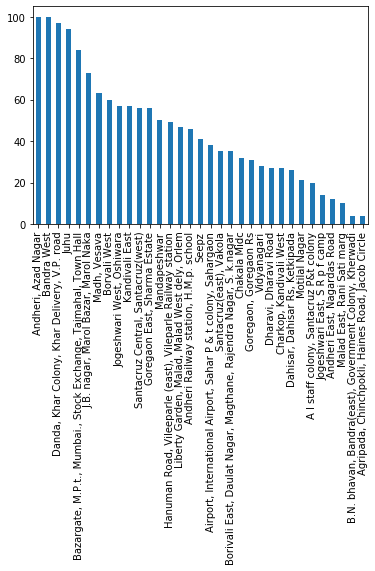

In [45]:
(data_final['location'].value_counts()).plot(kind='bar')

In [46]:
data_final.head()

,address,latitude,location,longitude,name,type
0,Waudby Road,18.938771,"Bazargate, M.P.t., Mumbai., Stock Exchange, Ta...",72.835335,Royal China,Chinese Restaurant
1,"# 16, Near Sterling Cinema, Murzban Road, Azad...",18.938771,"Bazargate, M.P.t., Mumbai., Stock Exchange, Ta...",72.835335,Town House Cafe,Bar
2,Shahid Bhagat Singh Road,18.938771,"Bazargate, M.P.t., Mumbai., Stock Exchange, Ta...",72.835335,Sher-E-Punjab,Indian Restaurant
3,"23/A, K Nayak Marg",18.938771,"Bazargate, M.P.t., Mumbai., Stock Exchange, Ta...",72.835335,Cafe Excelsior,Café
4,Dr. Dadabhai Naoroji Road,18.938771,"Bazargate, M.P.t., Mumbai., Stock Exchange, Ta...",72.835335,Chhatrapati Shivaji Maharaj Terminus,Train Station


In [0]:
#One Hot Encoding
one_hot = pd.get_dummies(data_final['type'])

In [48]:
one_hot.head()

,Airport Terminal,American Restaurant,Amphitheater,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Bengali Restaurant,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Business Service,Café,Campground,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,...,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Train,Train Station,Vegetarian / Vegan Restaurant,Volleyball Court,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
one_hot['location'] = data_final['location']

In [0]:
neigh_bombay = one_hot.copy()

In [0]:
neigh_bombay_filtered = neigh_bombay.groupby(by = 'location').mean()

In [52]:
neigh_bombay_filtered.head()

,Airport Terminal,American Restaurant,Amphitheater,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Bengali Restaurant,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Business Service,Café,Campground,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,...,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Train,Train Station,Vegetarian / Vegan Restaurant,Volleyball Court,Wine Bar,Wine Shop,Women's Store,Yoga Studio
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"A I staff colony, Santacruz P&t colony",0.0,0.0,0.0,0.0,0.000000,0.050000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.050000,0.0,0.0,0.000000,0.0,0.0,0.050000,0.0,0.000000,0.050000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.05,0.0,0.0,0.000000,0.05,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.050000,0.0,0.0,0.0,0.0,0.0
"Agripada, Chinchpokli, Haines Road, Jacob Circle",0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.0,0.0,0.0
"Airport, International Airport, Sahar P & t colony, Sahargaon",0.0,0.0,0.0,0.0,0.000000,0.052632,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.105263,0.0,0.0,0.026316,0.0,0.026316,0.000000,0.0,0.0,0.0,0.0,...,0.052632,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.052632,0.0,0.0,0.0,0.000000,0.0,0.026316,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.052632,0.0,0.0,0.0,0.0,0.0
"Andheri East, Nagardas Road",0.0,0.0,0.0,0.0,0.083333,0.083333,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.083333,0.0,0.000000,0.083333,0.0,0.0,0.0,0.0,...,0.083333,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
"Andheri Railway station, H.M.p. school",0.0,0.0,0.0,0.0,0.000000,0.021739,0.043478,0.0,0.0,0.021739,0.021739,0.0,0.086957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.0,0.043478,0.0,0.0,0.000000,0.0,0.0,0.021739,0.0,0.000000,0.065217,0.0,0.0,0.0,0.0,...,0.065217,0.0,0.00,0.0,0.0,0.086957,0.00,0.0,0.043478,0.0,0.0,0.0,0.021739,0.0,0.000000,0.0,0.0,0.043478,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.021739,0.0,0.0,0.0,0.0,0.0


In [53]:
neigh_bombay_filtered.shape

(33, 175)

# Clustering the data by K-Means and importing sklearn.cluster

In [0]:
# Applying K Means with four labels

In [0]:
from sklearn.cluster import KMeans

In [0]:
X = neigh_bombay_filtered

In [0]:
kmeans = KMeans(n_clusters=5, random_state=5).fit(X)

In [0]:
label = kmeans.labels_

In [0]:
#adding labels to the cluster

In [0]:
neigh_bombay_filtered['labels'] = label

In [61]:
neigh_bombay_filtered.head()

,Airport Terminal,American Restaurant,Amphitheater,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Bengali Restaurant,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Business Service,Café,Campground,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,...,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Train,Train Station,Vegetarian / Vegan Restaurant,Volleyball Court,Wine Bar,Wine Shop,Women's Store,Yoga Studio,labels
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"A I staff colony, Santacruz P&t colony",0.0,0.0,0.0,0.0,0.000000,0.050000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.050000,0.0,0.0,0.000000,0.0,0.0,0.050000,0.0,0.000000,0.050000,0.0,0.0,0.0,0.0,...,0.0,0.05,0.0,0.0,0.000000,0.05,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.050000,0.0,0.0,0.0,0.0,0.0,1
"Agripada, Chinchpokli, Haines Road, Jacob Circle",0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.25,0.000000,0.0,0.0,0.0,0.0,0.0,0
"Airport, International Airport, Sahar P & t colony, Sahargaon",0.0,0.0,0.0,0.0,0.000000,0.052632,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.105263,0.0,0.0,0.026316,0.0,0.026316,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.052632,0.0,0.0,0.0,0.000000,0.0,0.026316,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.052632,0.0,0.0,0.0,0.0,0.0,1
"Andheri East, Nagardas Road",0.0,0.0,0.0,0.0,0.083333,0.083333,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.083333,0.0,0.000000,0.083333,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,1
"Andheri Railway station, H.M.p. school",0.0,0.0,0.0,0.0,0.000000,0.021739,0.043478,0.0,0.0,0.021739,0.021739,0.0,0.086957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.0,0.043478,0.0,0.0,0.000000,0.0,0.0,0.021739,0.0,0.000000,0.065217,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.086957,0.00,0.0,0.043478,0.0,0.0,0.0,0.021739,0.0,0.000000,0.0,0.0,0.043478,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.021739,0.0,0.0,0.0,0.0,0.0,3


# Data visualisation

In [0]:
color = ['blue', 'yellow', 'green', 'red', 'black', 'purple', 'pink']

In [63]:
neigh_bom_map = folium.Map(zoom_start = 10, location= [19.07, 72.87])

for loc in neigh_bombay_filtered.index:
  lat = df[df['Location'] == loc]['Latitude'].unique()[0]
  lon = df[df['Location'] == loc]['Longitude'].unique()[0]
  folium.CircleMarker(
      [float(lat), float(lon)],
      radius = 10,
      popup = str(loc),
      color = color[int(neigh_bombay_filtered.loc[loc]['labels'])],
      fill_color = True
  ).add_to(neigh_bom_map)

neigh_bom_map

## Evaluating K-Means efficiency

In [0]:
from sklearn.metrics import silhouette_score

In [0]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, random_state=0).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

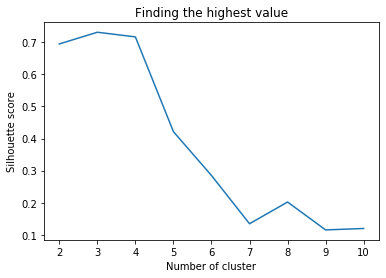

In [71]:
#plotting the score and finding optimal k
plt.plot(range(2,kmax+1), sil)
plt.xlabel('Number of cluster')
plt.ylabel('Silhouette score')
plt.title('Finding the highest value')
plt.show()

In [74]:
#Maximum coming at k = 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
label = kmeans.labels_
neigh_bombay_filtered['labels'] = label
neigh_bom_map = folium.Map(zoom_start = 10, location= [19.07, 72.87])

for loc in neigh_bombay_filtered.index:
  lat = df[df['Location'] == loc]['Latitude'].unique()[0]
  lon = df[df['Location'] == loc]['Longitude'].unique()[0]
  folium.CircleMarker(
      [float(lat), float(lon)],
      radius = 5,
      popup = str(loc),
      color = color[int(neigh_bombay_filtered.loc[loc]['labels'])],
      fill_color = True
  ).add_to(neigh_bom_map)

neigh_bom_map

## Result

### It could be concluded from the above map that the localities of Mumbai are not much different from each other, two types of clusters are there. It could be seen that localities lying along the coast are similar, which also aligns with our intuition.
